In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

**1. Загрузите файл HR.csv в pandas dataframe**

In [3]:
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).**

In [5]:
df.describe()
# mean - среднее
# 50% - медиана
# std - СКО (среднее квардратичное отклонение)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.mode(axis=0, numeric_only=False, dropna=True)
# мода - элементы [0]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

<AxesSubplot:>

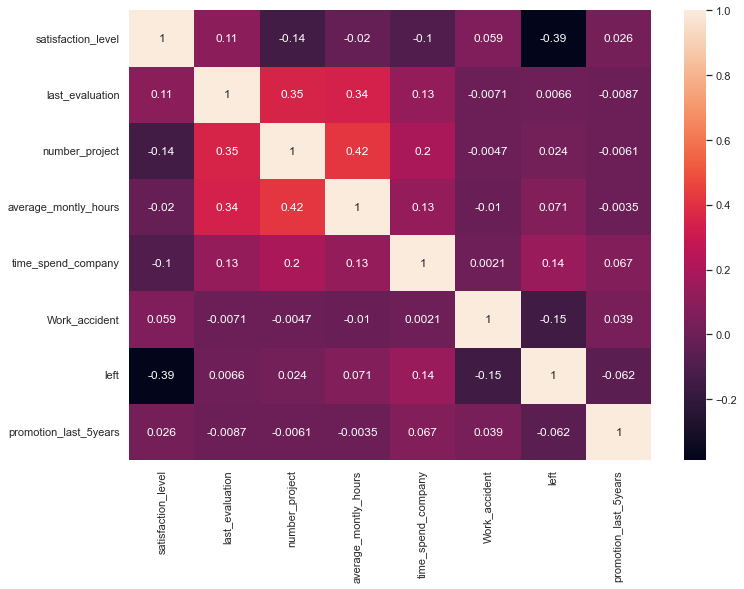

In [7]:
#Построим тепловую карту корреляции признаков между собой. 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

**Самые скоррелированные показатели**

уровень удовлетворенности и факт ухода из компании (-0.39, отрицательная корелляция)

среднее рабочее время и число проектов (0.42) 


**Наименее коррелирующие показатели** 

число проектов и уровень з\п (-0.0018)

несчастные случаи и время работы в компании (0.0021)



**4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [8]:
df.pivot_table(index = 'department', columns = 'left', values = 'salary', aggfunc = 'count', 
                    margins = True)
# если вопрос о кол-ве сотрудников на момент формирования датафрейма - колонка 0

left,0,1,All
department,,,
IT,954,273,1227
RandD,666,121,787
accounting,563,204,767
hr,524,215,739
management,539,91,630
marketing,655,203,858
product_mng,704,198,902
sales,3126,1014,4140
support,1674,555,2229


**5-6. Показать распределение сотрудников по зарплатам.**

In [9]:
df.pivot_table(index = 'salary', columns = 'department', values = 'satisfaction_level', aggfunc = 'count', margins = True)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201,1237
low,609,364,358,335,180,402,451,2099,1146,1372,7316
medium,535,372,335,359,225,376,383,1772,942,1147,6446
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [10]:
# нам нужны два массива - average_montly_hours и salary
# поскольку у нас нет числовых данных о зп, переведем категории зп в числовые значения.  

df.loc[(df.salary == 'low'), 'salary_num'] = 1
df.loc[(df.salary == 'medium'), 'salary_num'] = 2
df.loc[(df.salary == 'high'), 'salary_num'] = 3


df[['average_montly_hours', 'salary_num']].corr()

,average_montly_hours,salary_num
average_montly_hours,1.000000,-0.002242
salary_num,-0.002242,1.000000


(коэф-т менее |0.01| - корреляция очень слабая)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='average_montly_hours', ylabel='salary'>

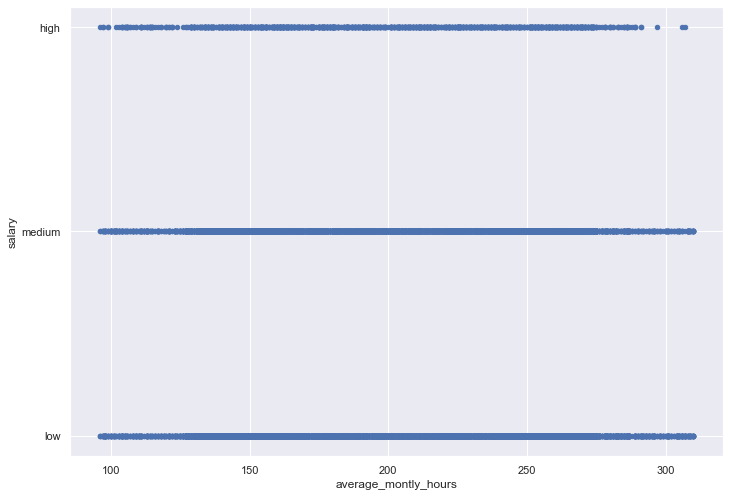

In [11]:
# на точечной диаграмме также не видно, чтобы люди, затрачивающие много/мало времени на работе,  имели зп, отличную от остальных
# есть обратное незначительное явление - сотрудники с з/п высокого уровня почти не проводят на работе более 300 ч
df.plot(kind='scatter', x='average_montly_hours', y='salary')

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

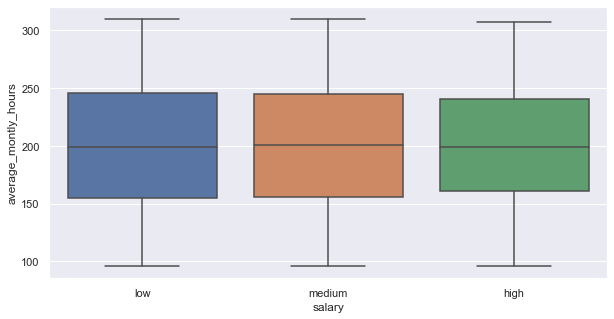

In [12]:
# диаграммы boxplot также очень похожи для разных уровней дохода
sns.set (rc={"figure.figsize":( 10 , 5 )})
sns.boxplot(x ="salary", y ="average_montly_hours", 
            data=df)

**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности)**

● Доля сотрудников с повышением за последние 5 лет


In [13]:
# % людей, которые получили повышение и остались в компании
df['left'][(df['left']==0) & (df['promotion_last_5years']==1)].count() / df['left'].count()*100

2.000133342222815

In [14]:
# % людей, которые получили повышение, но не остались в компании
df['left'][(df['left']==1) & (df['promotion_last_5years']==1)].count() / df['left'].count()*100

0.1266751116741116

Разница на порядок

Напрашиваются две теории:
- либо те сотрудники, которых не повышали, могли покинуть компанию по этой причине. 
- либо те сотрудники, которые остались в компании, получили повышение вследствие этого (не напрямую по этой причине, конечно)

● Средняя степень удовлетворенности


In [15]:
# средняя удовлетворенность людей, которые остались в компании
df['satisfaction_level'][(df['left']==0)].mean()

0.666809590479516

In [16]:
# средняя удовлетворенной людей, которые ушли из компании, - намного меньше, чем у оставишихся
df['satisfaction_level'][(df['left']==1)].mean()

0.44009801176140917

● Среднее количество проектов

In [17]:
# среднее число проектов у людей, которые остались в компании
df['number_project'][(df['left']==0)].mean()

3.786664333216661

In [19]:
# среднее число проектов у людей, ушедших из компании -несколько выше
df['number_project'][(df['left']==1)].mean()

3.8555026603192384

**9. Регрессионный анализ**

Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборке

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
X = df[['satisfaction_level',
        'last_evaluation',
        'number_project',  
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years']
      ]
y = df['left'] 
       
# разделим переменную и функцию от нее на два массива - для обучения и для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:
# создадим модель
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [91]:
# к-ты a, которые подобрала модель
model.coef_

array([-6.67146494e-01,  8.94636378e-02, -3.06965508e-02,  6.63799684e-04,
        3.22562759e-02, -1.53085014e-01, -1.58223059e-01])

In [92]:
# независимый к-т b
model.intercept_

0.47953595530617515

In [93]:
y_pred = model.predict(X_test)
y_pred

array([ 0.03973934,  0.0466316 ,  0.22135527, ...,  0.11480934,
       -0.02000725,  0.07926176])

In [94]:
# оценим качество модели с помощью к-та детерминации
model.score(X_test, y_test)
# низкий уровень детерминированности

0.18326882703830805

**10. Загрузить jupyter notebook с решение на github и прислать ссылку**